In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv("Data_Quest_2.csv")
df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## EDA Data

In [71]:
# Kiểm tra cấu trúc dữ kiệu có đủ lớn hay ko
df.shape

(10000, 12)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [22]:
# df.isnull().sum()
# '''Sơ qua về data:
#         customerID: Số tài khoản
#         credit_score: Điểm tín dụng
#         country: Quốc gia
#         Gender: Giới tính
#         age: tuổi
#         tenure: Số năm dùng tài khoản của ngân hàng ABC
#         balance: Số dư tài khoản
#         product_number: Số lượng sản phẩm từ ngân hàng
#         credit_card: có thẻ tín dụng hay ko 
#         active_member: Có phải thành viên tích cực hay ko
#         estimated_salary: Mức lương của chủ tài khoản
#         churn: Có rời bỏ hay ko 
# '''

In [73]:
# Xem qua các trường object
object_cols = [i for i in df.columns if df[i].dtype == "O"]
print(object_cols)

['country', 'gender']


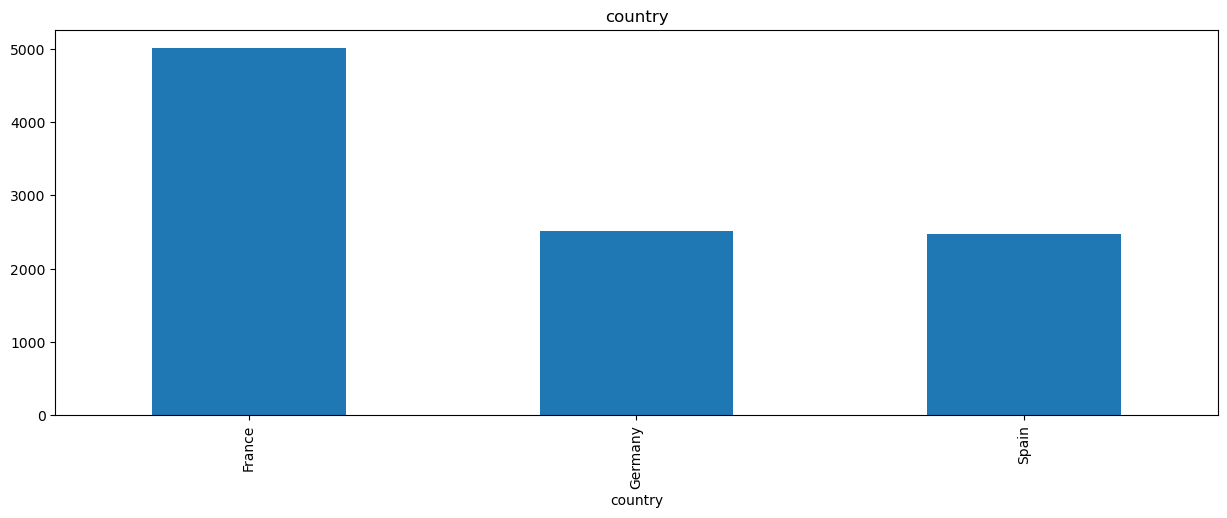

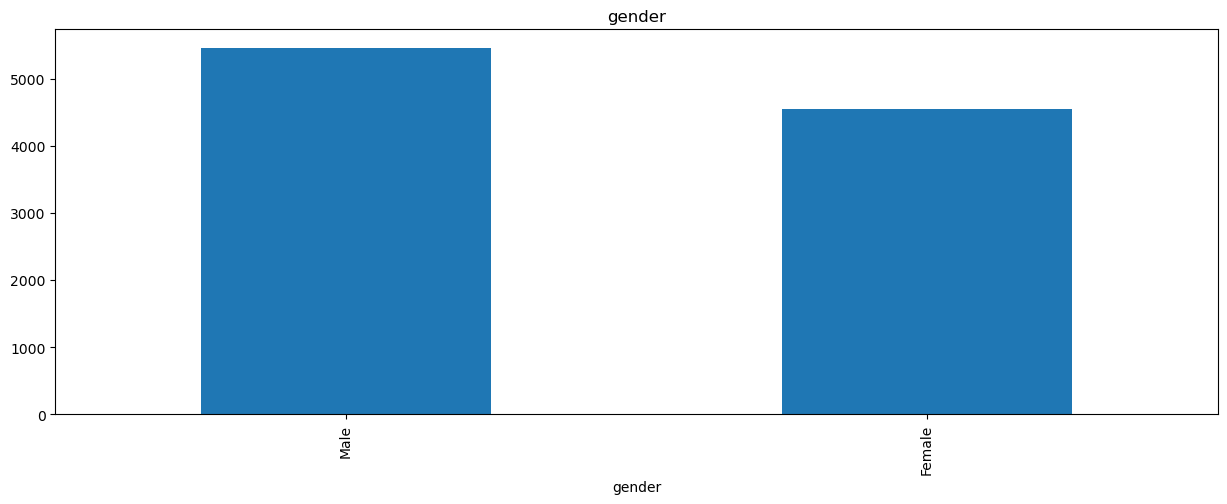

In [74]:
#Check số lượng các giá trị của object_cols
for col in object_cols:
    df[col].value_counts().plot(kind = 'bar', figsize = (15,5))
    plt.title(col)
    plt.show()

In [19]:
'''Có hai trường object đó là 'gender' và 'country', dễ thấy rằng dữ liệu hai trường này 
ko mang tính thứ bậc nên ta sẽ mã hóa bằng ONEHOT ENCODING cho cả dữ liệu
'''

"Có hai trường object đó là 'gender' và 'country', dễ thấy rằng dữ liệu hai trường này \nko mang tính thứ bậc nên đối với trường 'country' ta sẽ mã hóa bằng ONEHOT ENCODING và \ntrường 'gender' sẽ mã hóa bằng 'label_encoder()' do chỉ có 2 giá trị \n"

In [75]:
#check các trường numeric
numeric_cols = [i for i in df.columns if df[i].dtype != 'O']
print(numeric_cols)

['customer_id', 'credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']


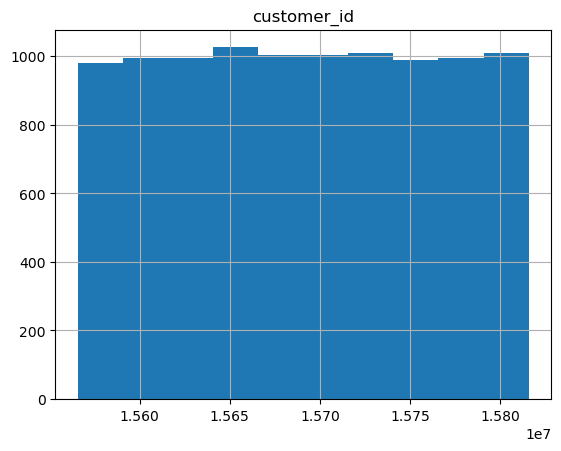

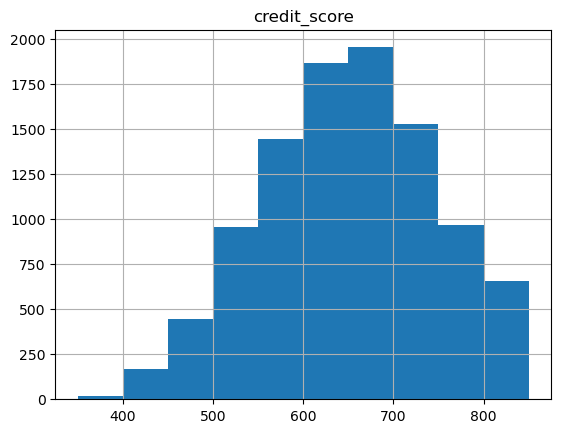

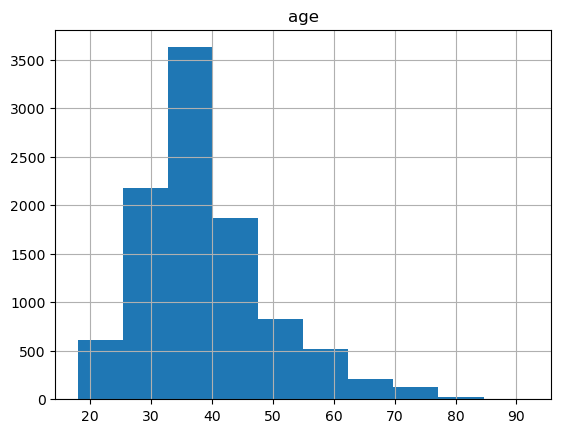

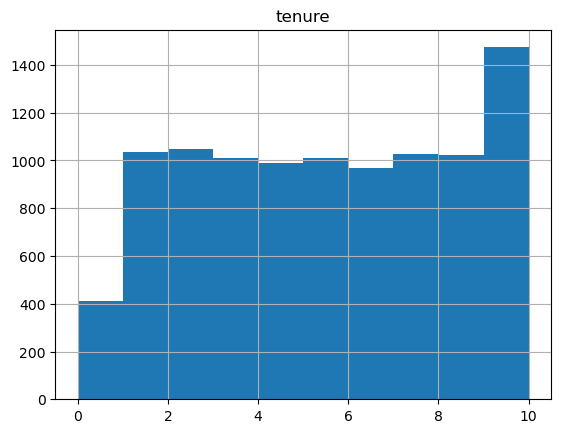

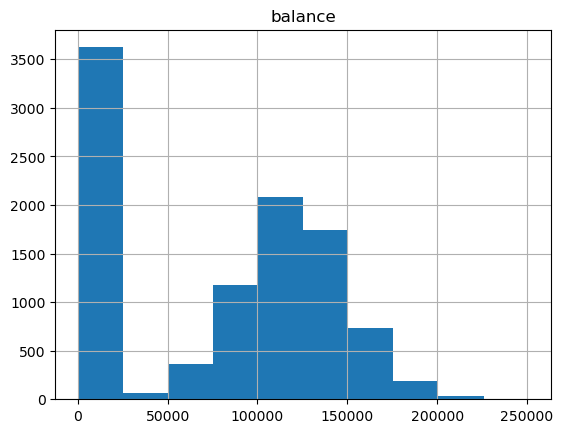

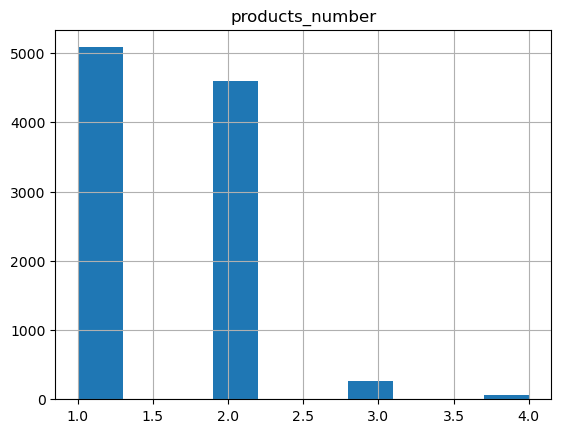

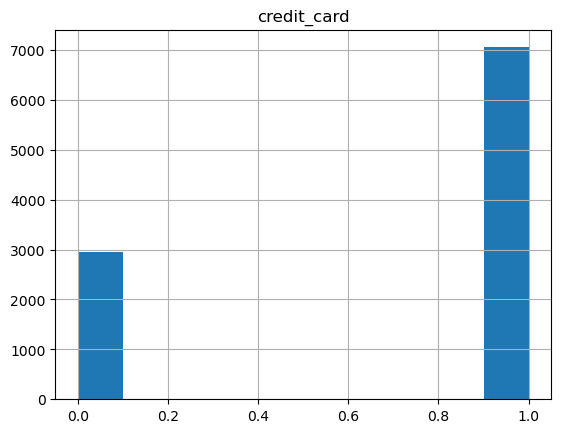

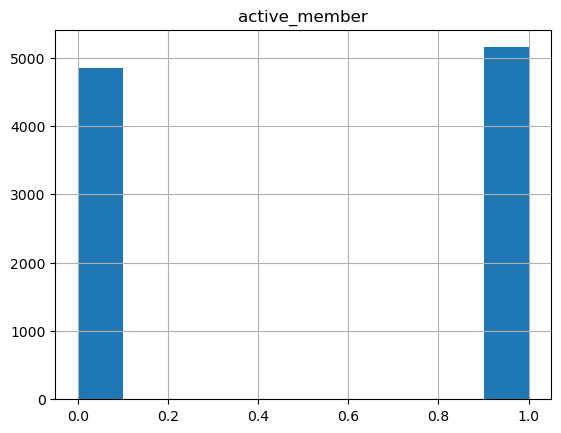

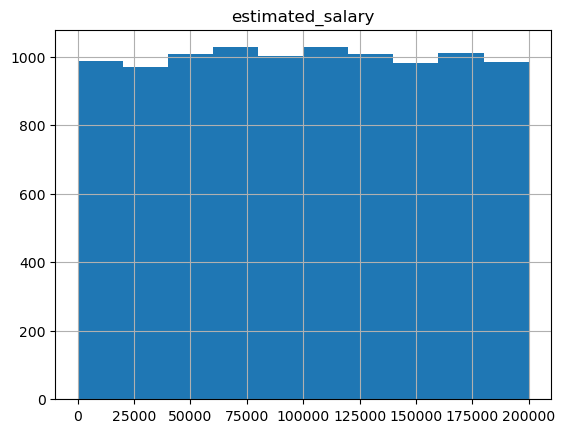

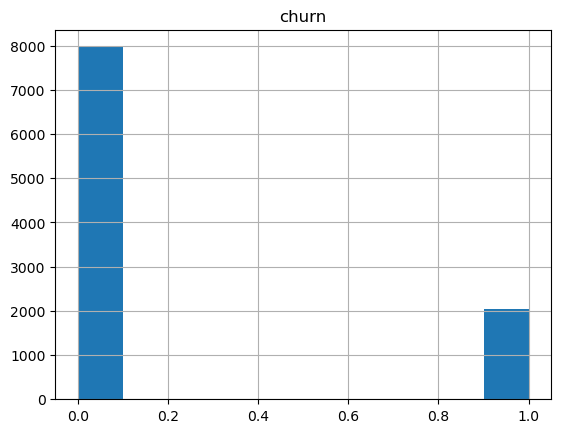

In [76]:
for col in numeric_cols:
    df[col].hist() #numerric data thì check bằng biểu đồ hist
    plt.title(col)
    plt.show()

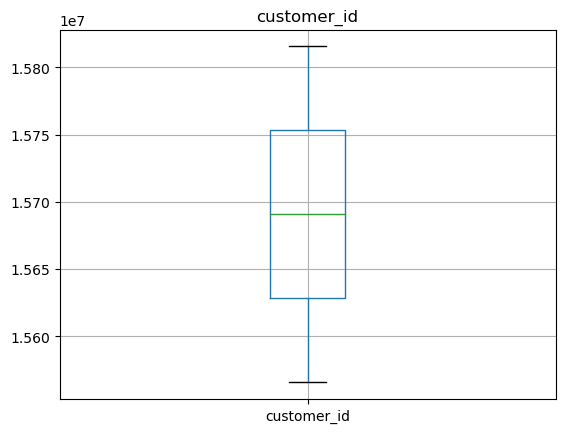

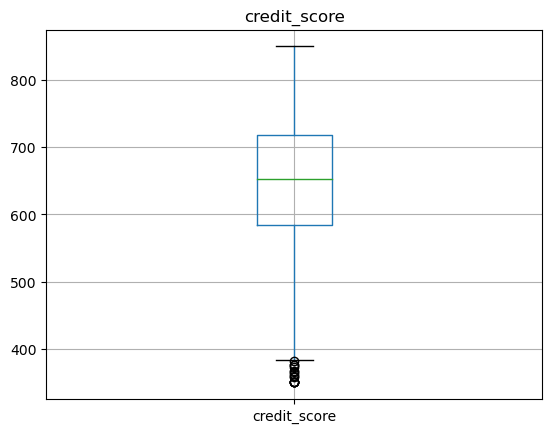

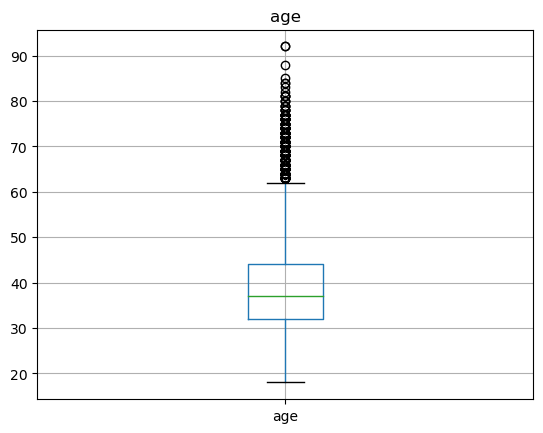

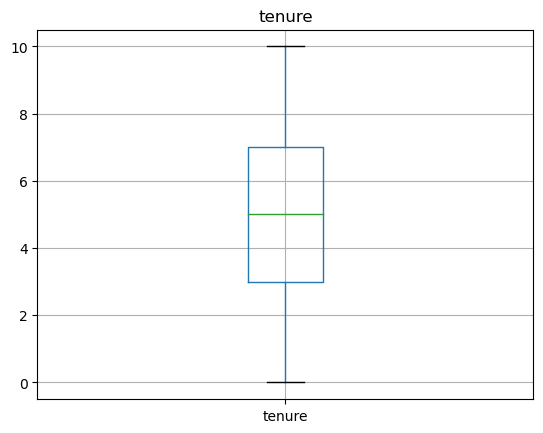

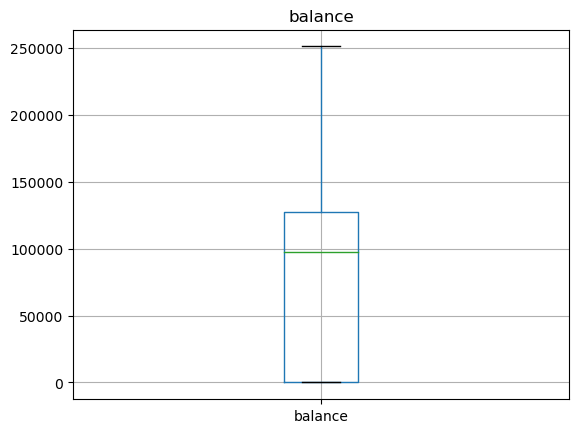

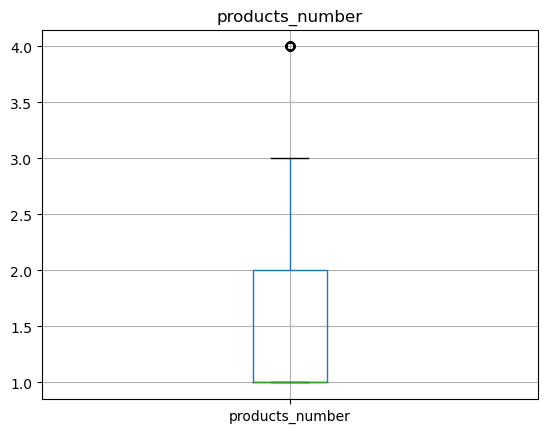

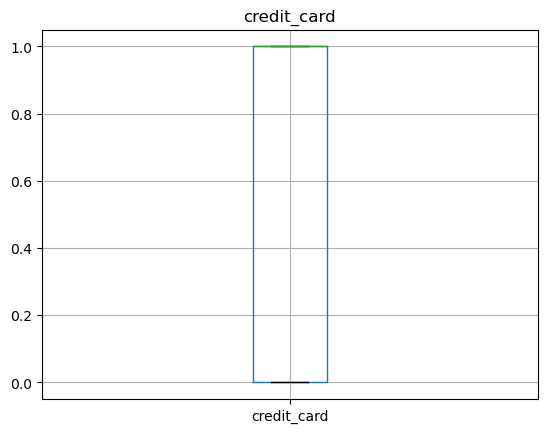

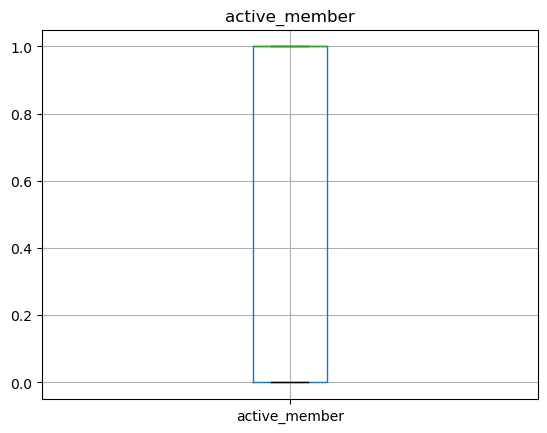

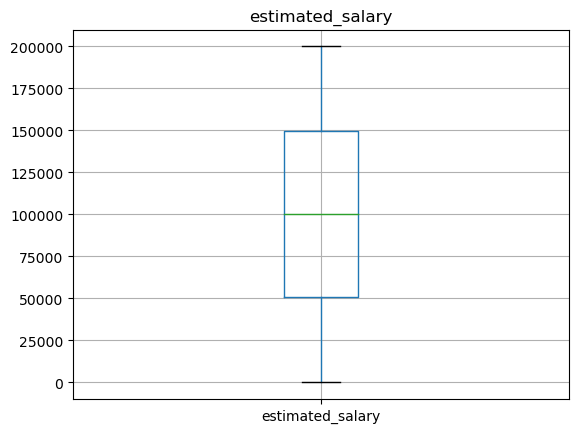

In [77]:
#check outliner
for col in numeric_cols:
    if col != 'churn':
        df.boxplot(column=[col])
        plt.title(col)
        plt.show()

In [35]:
#check cột age, do có khá nhiều giá trị outliner nhưng thấy vẫn có mối liên quan đến 'churn' nên giữ lại 
# df['age'].value_counts()
# df['credit_score'].value_counts()


<Axes: xlabel='churn'>

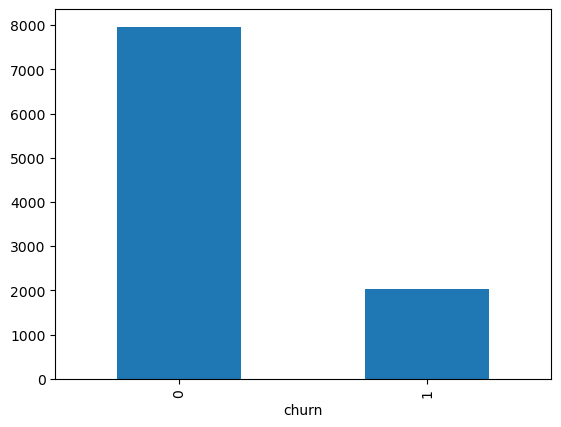

In [78]:
#check inbalance 
df['churn'].value_counts().plot(kind='bar')

In [ ]:
#có 80% giá trị là 0 và 20% giá trị 1 dẫn đến dữ liệu mất cân bằng

### Tiền xử lí dữ liệu để đưa vào model

In [79]:
dataset = df.copy()
dataset

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [81]:
#xóa bỏ cột customer_id do không liên quan đến model
data = dataset.drop(['customer_id'],axis=1)

In [83]:
# one hot encoding
data_new = pd.get_dummies(data,drop_first=True)
data_new


,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [86]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   age               10000 non-null  int64  
 2   tenure            10000 non-null  int64  
 3   balance           10000 non-null  float64
 4   products_number   10000 non-null  int64  
 5   credit_card       10000 non-null  int64  
 6   active_member     10000 non-null  int64  
 7   estimated_salary  10000 non-null  float64
 8   churn             10000 non-null  int64  
 9   country_Germany   10000 non-null  bool   
 10  country_Spain     10000 non-null  bool   
 11  gender_Male       10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.6 KB


In [88]:
import seaborn as sns

In [90]:
#check correlation
corr = data_new.corr()
corr.style.format(precision=2).background_gradient(cmap ='coolwarm')

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
credit_score,1.00,-0.00,0.00,0.01,0.01,-0.01,0.03,-0.00,-0.03,0.01,0.00,-0.00
age,-0.00,1.00,-0.01,0.03,-0.03,-0.01,0.09,-0.01,0.29,0.05,-0.00,-0.03
tenure,0.00,-0.01,1.00,-0.01,0.01,0.02,-0.03,0.01,-0.01,-0.00,0.00,0.01
balance,0.01,0.03,-0.01,1.00,-0.30,-0.01,-0.01,0.01,0.12,0.40,-0.13,0.01
products_number,0.01,-0.03,0.01,-0.30,1.00,0.00,0.01,0.01,-0.05,-0.01,0.01,-0.02
credit_card,-0.01,-0.01,0.02,-0.01,0.00,1.00,-0.01,-0.01,-0.01,0.01,-0.01,0.01
active_member,0.03,0.09,-0.03,-0.01,0.01,-0.01,1.00,-0.01,-0.16,-0.02,0.02,0.02
estimated_salary,-0.00,-0.01,0.01,0.01,0.01,-0.01,-0.01,1.00,0.01,0.01,-0.01,-0.01
churn,-0.03,0.29,-0.01,0.12,-0.05,-0.01,-0.16,0.01,1.00,0.17,-0.05,-0.11
country_Germany,0.01,0.05,-0.00,0.40,-0.01,0.01,-0.02,0.01,0.17,1.00,-0.33,-0.02


In [ ]:
#ngoài đường chéo chính không xuất hiện cột nào có hệ số correlation cao nên ko cần bỏ cột nào

### Xây dựng Model

In [ ]:
#Các cột 'Credit_score', 'age','balance ', 'tenure', 'products_number','estimated_salary'
#có vùng phân bố dữ liệu khác nhau -> Sẽ Scale tất cả về vùng dữ liệu [0,1] để model hoạt động tốt hơn

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
from sklearn.linear_model import LogisticRegression

In [119]:
X = data_new.drop(['churn'],axis=1)
y = data_new['churn']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 12)


In [120]:
X_test.head(5)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male
5669,648,33,7,135310.41,2,0,1,171668.20,True,False,True
8800,691,37,9,149405.18,1,1,1,146411.60,False,False,True
3205,850,42,8,0.00,1,1,0,19632.64,False,False,False
8731,727,41,10,0.00,2,0,1,47468.56,False,True,False
6412,602,53,5,98268.84,1,0,1,45038.29,True,False,False


In [121]:
#Scale dữ liệu
#Các cột 'Credit_score', 'age','balance ', 'tenure', 'products_number','estimated_salary'

scale_columns = ['credit_score','age','tenure','balance','products_number','estimated_salary']
scaler = MinMaxScaler()
scaler.fit(X_train[scale_columns])
X_train[scale_columns] = scaler.transform(X_train[scale_columns])
X_test[scale_columns] = scaler.transform(X_test[scale_columns])

X_train.shape


(8000, 11)

In [122]:
X_test.shape

(2000, 11)

In [128]:
def print_score(y_true,y_pred):
    print(classification_report(y_true,y_pred))

In [129]:
#Train model với imbalace data (như phân tích ở trên)

#Khởi tạo model
model_log = LogisticRegression()

#fit với dữ liệu train
model_log.fit(X_train,y_train)

#Dự đoán với dữ liệu test
y_pred  = model_log.predict(X_test)

#In ra các kết quả
print_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.81      0.97      0.89      1564
           1       0.68      0.20      0.31       436

    accuracy                           0.81      2000
   macro avg       0.75      0.59      0.60      2000
weighted avg       0.78      0.81      0.76      2000



In [131]:
# from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# cm = confusion_matrix(y_test, y_pred, labels=model_log.classes_)
# cm_matrix = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_log.classes_)
# cm_matrix.plot()
# plt.show()


In [133]:
'''Dễ thấy Accuracy = 0.81 và các chỉ số precition, recall, f1-score của
lớp 0 khá cao, nhưng ở lớp 1 tức lớp dự đoán khách hàng rời bỏ dịch vụ lại rất thấp
và chỉ phát hiện được recall = 20% khách hàng rời bỏ dịch vụ'''

#Xử lí imbalance bằng 'class weight': wj = n_sample/ (n_classes * n_samplej)
model_log = LogisticRegression(class_weight='balanced')
model_log.fit(X_train,y_train)

y_pred  = model_log.predict(X_test)


print_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1564
           1       0.41      0.70      0.52       436

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.66      2000
weighted avg       0.79      0.71      0.74      2000



In [ ]:
# Acciracy giảm xuống 0.71 nhưng recall, f1_score lớn hơn tức là model dự đoán ra khách hàng rời bỏ tốt hơn

#### Thử với Random Forest, Gradient Boosting và XGBoost

In [134]:
from sklearn.ensemble import RandomForestClassifier

#Khởi tạo model
model_RF = RandomForestClassifier(n_estimators=200, random_state=42)

#Fit vào dữ liệu train
model_RF.fit(X_train,y_train)

#Dự đoán với dữ liệu test
y_pred = model_RF.predict(X_test)

#In kết quả
print_score(y_test,y_pred)


              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1564
           1       0.83      0.50      0.62       436

    accuracy                           0.87      2000
   macro avg       0.85      0.74      0.77      2000
weighted avg       0.87      0.87      0.86      2000



In [135]:
#Gradient boosting 
from sklearn.ensemble import GradientBoostingClassifier
model_GB = GradientBoostingClassifier(n_estimators=200, random_state=42, learning_rate=0.01)
model_GB.fit(X_train,y_train)
y_pred = model_GB.predict(X_test)
print_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1564
           1       0.90      0.33      0.49       436

    accuracy                           0.85      2000
   macro avg       0.87      0.66      0.70      2000
weighted avg       0.86      0.85      0.82      2000



In [138]:
# pip install xgboost

In [140]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier(random_state=42,n_estimators=200)
model_xgb.fit(X_train,y_train)
y_pred = model_xgb.predict(X_test)
print_score(y_test,y_pred)


              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1564
           1       0.71      0.50      0.59       436

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.75      2000
weighted avg       0.84      0.85      0.84      2000



In [143]:
# data_new #data đã encoder
data['churn'].value_counts() #data chưa encoder

churn
0    7963
1    2037
Name: count, dtype: int64

## Xử lí imbalance

### Random Undersampling

In [146]:
'''Random Undersampling: Lấy ngẫu nhiên 1 tập từ lớp đa số (0) sao cho số dữ kiệu gần bằng 
lớp thiểu số (1) để model hoạt động tốt hơn'''
data_class0 = data[data['churn'] == 0 ]
data_class1 = data[data['churn'] == 1 ]
# data_class0.sample(3)
data_class0.shape, data_class1.shape

((7963, 11), (2037, 11))

In [150]:
data_class0_RU = data_class0.sample(data_class1.shape[0])
data_class0_RU.shape

(2037, 11)

In [151]:
data_RU = pd.concat([data_class0_RU,data_class1])
data_RU.shape

(4074, 11)

In [153]:
data_RU_new = pd.get_dummies(data_RU,drop_first=True)
data_RU_new

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
2890,586,34,5,168094.01,1,0,0,20058.61,0,False,True,True
7666,494,25,6,0.00,2,0,1,109988.09,0,False,False,True
9230,582,35,8,121309.17,2,1,1,28750.67,0,True,False,True
4678,580,61,8,125921.37,1,1,1,94677.83,0,False,True,True
3772,745,34,7,132944.53,1,1,1,31802.92,0,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,498,42,3,152039.70,1,1,1,53445.17,1,True,False,True
9982,655,46,7,137145.12,1,1,0,115146.40,1,True,False,False
9991,597,53,4,88381.21,1,1,0,69384.71,1,False,False,False
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False


In [155]:
#Chia lại train, test
X = data_RU_new.drop(['churn'],axis=1)
y = data_RU_new['churn']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 12)

#Scale
scale_columns = ['credit_score','age','tenure','balance','products_number','estimated_salary']
scaler = MinMaxScaler()
scaler.fit(X_train[scale_columns])
X_train[scale_columns] = scaler.transform(X_train[scale_columns])
X_test[scale_columns] = scaler.transform(X_test[scale_columns])

# Xây dựng model
model_Log = LogisticRegression()
model_Log.fit(X_train,y_train)
y_pred = model_Log.predict(X_test)
print_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       412
           1       0.71      0.74      0.73       403

    accuracy                           0.72       815
   macro avg       0.72      0.72      0.72       815
weighted avg       0.72      0.72      0.72       815



In [ ]:
''' Model dự đoán tốt hơn do các chỉ số recall, precision, f1_score được cải thiện
tuy nhiên việc sử dụng random undersampling có thể gây mất một vài sample quan trọng trong class đa số(0)
'''

In [156]:
#Random Undersampling kết hợp XGBoost
model_XGB = xgb.XGBClassifier(random_state=42,n_estimators=200)
model_XGB.fit(X_train,y_train)
y_pred = model_xgb.predict(X_test)
print_score(y_test,y_pred)


              precision    recall  f1-score   support

           0       0.79      0.97      0.87       412
           1       0.96      0.74      0.84       403

    accuracy                           0.86       815
   macro avg       0.88      0.86      0.85       815
weighted avg       0.88      0.86      0.85       815



### Oversampling

In [170]:
'''Random Oversampling: Nhân bản ngẫu nhiên lớp thiểu số (1) 
để cân bằng với lớp đa số (0) -> dữ liệu có thể bị duplicate
   SMOTE: Sinh ra dữ liệu của lớp thiểu số bằng cách nhân thêm các điểm mới gần các điểm có sẵn
-> Do sinh ra dữ liệu mới nên không bị duplicate và mất điểm dữ liệu quan trọng như undersampling
'''

'Random Oversampling: Nhân bản ngẫu nhiên lớp thiểu số (1) \nđể cân bằng với lớp đa số (0) -> dữ liệu có thể bị duplicate\n   SMOTE: Sinh ra dữ liệu của lớp thiểu số bằng cách nhân thêm các điểm mới gần các điểm có sẵn\n-> Do sinh ra dữ liệu mới nên không bị duplicate và mất điểm dữ liệu quan trọng như undersampling\n'

In [171]:
#Thay vì chia dữ liệu ra làm 2 lớp rồi tăng lớp thiểu số thì ta sẽ dùng thư viện imblearn cho RandomOversampling
# from imblearn.over_sampling import RandomOverSampler  
# from imblearn.over_sampling import SMOTE, SVMSMOTE
